<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/QCTL_FireOpal_Access_to_Amazon_Braket_with_qiskit_braket_provider_mkbahk_20250410.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 작업순서
1. Amazon Braket 환경 설정(확인만)
2. S3 환경설정(확인만)
3. (중요) IAM을 이용한 Access Key 설정 및 권한 부여
4. 원격 작업
5. 각종 로그 보기
6. 작업 환경 정리


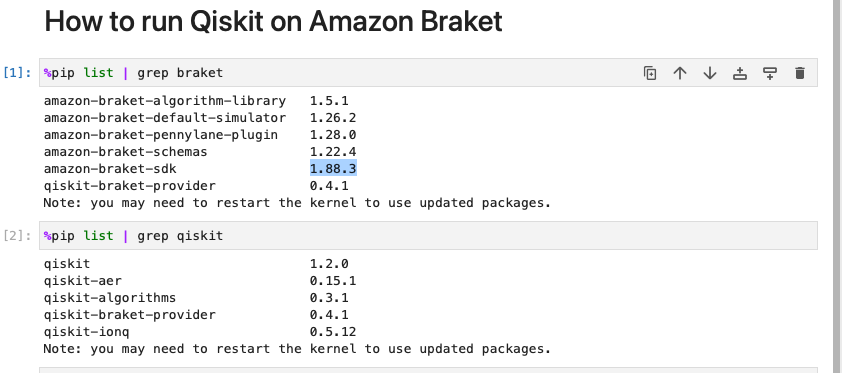

In [1]:
!python3 -m pip install qiskit[visualization]==1.2.0
!python3 -m pip install qiskit-braket-provider==0.4.1
!python3 -m pip install amazon-braket-sdk==1.88.3
#!python3 -m pip install boto3
#!python3 -m pip install botocore

In [26]:
%pip install fire-opal
import fireopal as fo

In [6]:
# Use Braket SDK Cost Tracking to estimate the cost to run this example
from braket.tracking import Tracker
t = Tracker().start()

In [36]:
import os
# Set environment variables for AWS credentials
os.environ['AWS_ACCESS_KEY_ID'] = ""
os.environ['AWS_SECRET_ACCESS_KEY'] = ""
os.environ['AWS_DEFAULT_REGION'] = "us-east-1"

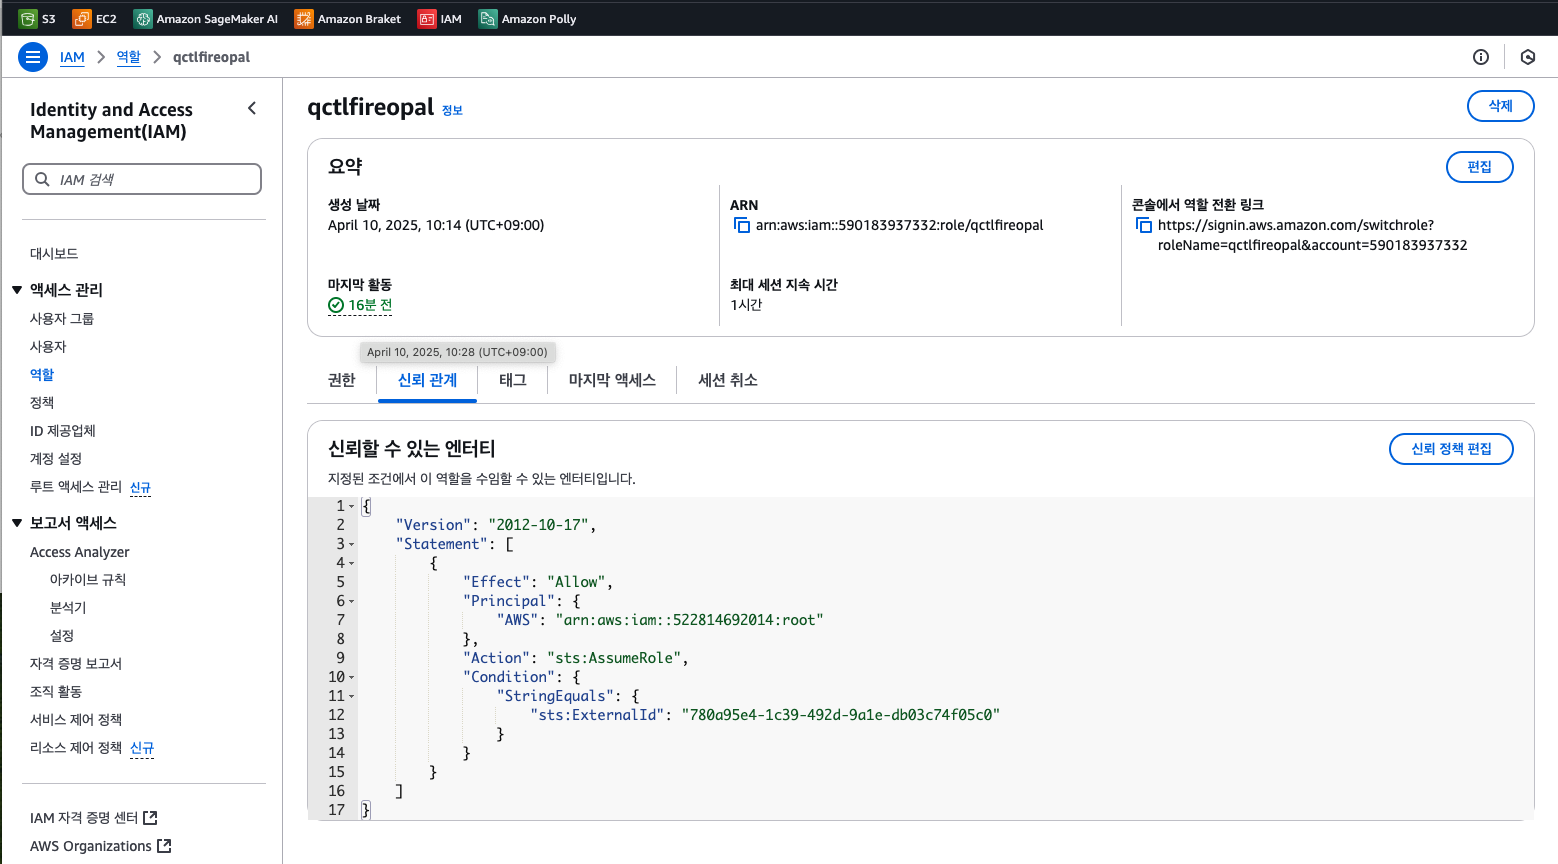

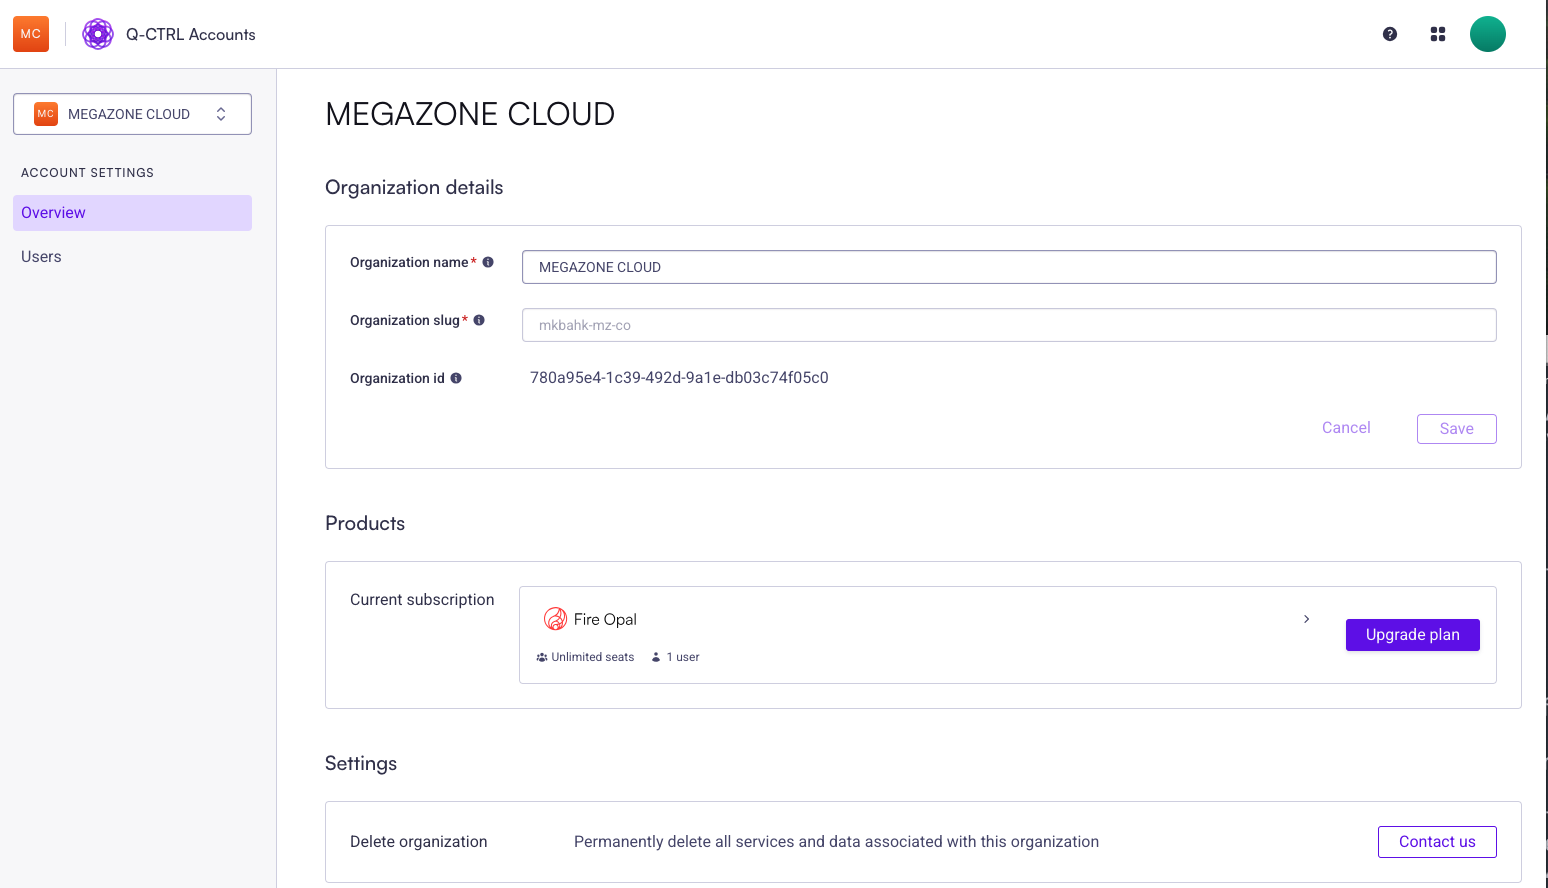

In [37]:
#Configure Fire Opal and create Braket credentials
#fo.config.configure_organization("mkbahk-mz-co")
#arn = "arn:aws:iam::590183937332:role/Q_CTRLFireOpal"
#credentials = fo.credentials.make_credentials_for_braket(arn=arn)

api_key = ""
fo.authenticate_qctrl_account(api_key=api_key)

arn = "arn:aws:iam::590183937332:role/qctlfireopal"
credentials = fo.credentials.make_credentials_for_braket(arn=arn)

Q-CTRL authentication successful!


In [38]:
from fireopal import print_package_versions

print_package_versions()

| Package               | Version |
| --------------------- | ------- |
| Python                | 3.11.11 |
| matplotlib            | 3.10.0  |
| networkx              | 2.8.8   |
| numpy                 | 1.26.4  |
| qiskit                | 1.2.0   |
| sympy                 | 1.13.1  |
| fire-opal             | 8.4.0   |
| qctrl-workflow-client | 5.5.0   |


In [40]:
supported_devices = fo.show_supported_devices(credentials=credentials)[
    "supported_devices"
]
for name in supported_devices:
    print(name)

Aria-1
Aria-2
Forte-1


In [41]:
from qiskit import QuantumCircuit, qasm3

# Create your quantum circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

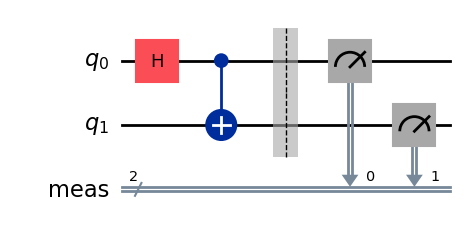

In [42]:
qc.draw("mpl")

In [43]:
# Convert the circuit to QASM string
#circuit_qasm = qc.qasm()
circuit_qasm = qasm3.Exporter().dumps(qc)
print(circuit_qasm)

OPENQASM 3.0;
include "stdgates.inc";
bit[2] meas;
qubit[2] q;
h q[0];
cx q[0], q[1];
barrier q[0], q[1];
meas[0] = measure q[0];
meas[1] = measure q[1];



In [44]:
fire_opal_job = fo.execute(
    circuits=[circuit_qasm],
    shot_count=1024,
    credentials=credentials,
    backend_name="Aria-1")

In [45]:
# Once the workload has finished you can retrieve the optimized result
fire_opal_result = fire_opal_job.result()
bitstring_results = fire_opal_result["results"]

In [46]:
print(bitstring_results)

[{'00': 0.4842703640460968, '01': 0.0004036019090563059, '10': 0.004718940705060959, '11': 0.5106070637702942}]


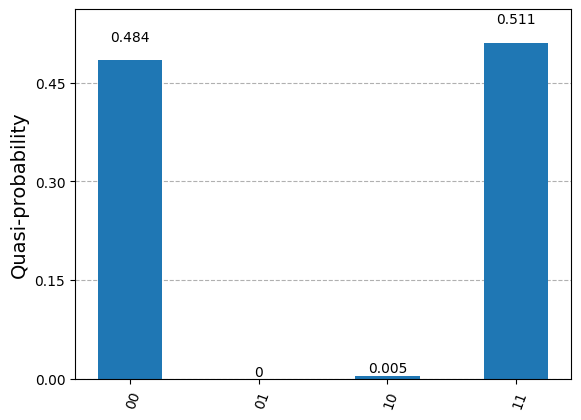

In [49]:
from qiskit.visualization import plot_histogram

# Plot the histogram
plot_histogram(bitstring_results)